<a href="https://colab.research.google.com/github/MustafaJ98/ECSE415_Computer_Vision/blob/master/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ECSE 415 Intro to Computer Vision

Assignemt 1

Author: Mustafa Javed

Images provided by Prof James J. Clark



In [1]:
#import libraries
import matplotlib.pyplot as plt
import matplotlib.image as img
import cv2
import numpy as np

#mount drive
from google.colab import drive
drive.mount('/content/drive')

#define images path
path = '/content/drive/My Drive/ECSE 415/Assignment 1/images/'


Mounted at /content/drive


## 1. Binary Thresholding###

### 1.1 Simple Binary Thresholding ###


In [ ]:
# read image into variable. Apply a grayscale filter
numbers = img.imread(path + '/numbers.jpg')
numbersGray = cv2.cvtColor(numbers, cv2.COLOR_RGB2GRAY)

# A method that takes an image and threshold and apply simple binary thrsholding
def simple_binary_thresholding (image, threshold):
  resolution = image.shape
  imagetemp = np.zeros_like(image)
  imagetemp[image > threshold] = 255
  imagetemp[image <= threshold] = 0
  return imagetemp   

plt.figure(figsize=(15,15))

plt.subplot(321)
plt.imshow(numbers)

plt.subplot(323)
plt.imshow(numbers)

plt.subplot(325)
plt.imshow(numbers)

plt.subplot(322)
plt.imshow( simple_binary_thresholding(numbersGray, 55) , cmap= 'gray')

plt.subplot(324)
plt.imshow( simple_binary_thresholding(numbersGray, 90) , cmap= 'gray')

plt.subplot(326)
plt.imshow( simple_binary_thresholding(numbersGray, 150) , cmap= 'gray')




### 1.2 Inverse Binary Thresholding ###

In [ ]:
numbers = img.imread(path + 'numbers.jpg')
numbersGray = cv2.cvtColor(numbers, cv2.COLOR_RGB2GRAY)

def inverse_binary_thresholding (image, threshold):
  resolution = image.shape
  imagetemp = np.zeros_like(image)
  imagetemp[image < threshold] = 255
  imagetemp[image >= threshold] = 0
  return imagetemp

plt.figure(figsize=(15,15))

plt.subplot(321)
plt.imshow(numbers)

plt.subplot(323)
plt.imshow(numbers)

plt.subplot(325)
plt.imshow(numbers)

plt.subplot(322)
plt.imshow( inverse_binary_thresholding(numbersGray, 55) , cmap= 'gray')


plt.subplot(324)
plt.imshow( inverse_binary_thresholding(numbersGray, 90) , cmap= 'gray')

plt.subplot(326)
plt.imshow( inverse_binary_thresholding(numbersGray, 150) , cmap= 'gray')


### 1.3 Window Binary Thresholding ###

In [ ]:
numbers = img.imread(path + 'numbers.jpg')
numbersGray = cv2.cvtColor(numbers, cv2.COLOR_RGB2GRAY)

def window_binary_thresholding (image, T1, T2):

  imagetemp = np.zeros_like(image)
  imagetemp[ (image > T1)  & (image < T2) ] = 255
  imagetemp[ (image <= T1) | (image >= T2)] = 0

  return imagetemp

plt.figure(figsize=(15,15))

plt.subplot(321)
plt.imshow(numbers)

plt.subplot(323)
plt.imshow(numbers)

plt.subplot(325)
plt.imshow(numbers)

plt.subplot(322)
plt.imshow( window_binary_thresholding(numbersGray, 55, 90) , cmap= 'gray')


plt.subplot(324)
plt.imshow( window_binary_thresholding(numbersGray, 90, 150) , cmap= 'gray')

plt.subplot(326)
plt.imshow( window_binary_thresholding(numbersGray, 55, 150) , cmap= 'gray')


# Question 2: Denoising #

###2.1 Denoising using a 5x5 Gaussian filter with variance equal to 2. ##
* Image: Lighthouse.png
* Noise Type: Gaussian
* Filter Type: Gaussian Blur

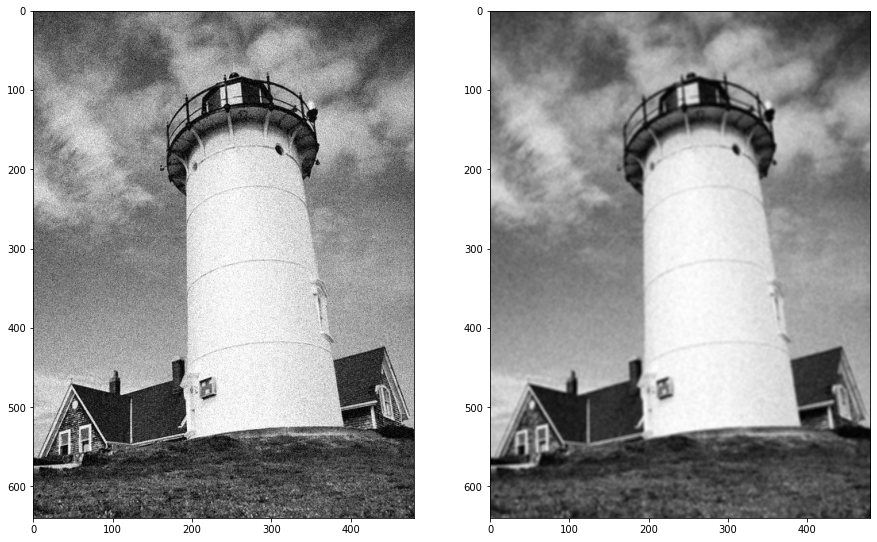

In [ ]:
gaussian_lighthouse = img.imread('/content/drive/My Drive/ECSE 415/Assignment 1/images/gaussian_lighthouse.png')
gray2_1 = cv2.cvtColor(gaussian_lighthouse, cv2.COLOR_RGB2GRAY)

image2_1 = cv2.GaussianBlur( gray2_1, (5,5) , 2)

plt.figure(figsize=(15,15))

plt.subplot(121)
plt.imshow(gray2_1, cmap = 'gray')

plt.subplot(122)
plt.imshow(image2_1, cmap = 'gray')

###2.2 Denoising using a 5x5 box filter ##
* Image: Lighthouse.png
* Noise Type: Gaussian
* Filter Type: Box Filter

In [ ]:
gaussian_lighthouse = img.imread(path + 'gaussian_lighthouse.png')
gray2_2 = cv2.cvtColor(gaussian_lighthouse, cv2.COLOR_RGB2GRAY)

gray_int16 = (gray2_2*255).astype('int16')

kernel_box = np.array([[1,1,1],
                         [1,1,1],
                         [1,1,1]])/(9)

image2_2 = cv2.filter2D(gray_int16, cv2.CV_16S, kernel_box)

plt.figure(figsize=(15,15))

plt.subplot(121)
plt.imshow(gray_int16, cmap = 'gray')

plt.subplot(122)
plt.imshow(image2_2, cmap = 'gray')

### 2.3 PSNR ###

In [ ]:
PSNR_2_1 = cv2.PSNR(gray2_1,image2_1)
PSNR_2_2 = cv2.PSNR(gray_int16,image2_2)

print('The PSNR of images in 2.1 is ' + str(PSNR_2_1))
print('The PSNR of images in 2.2 is ' + str(PSNR_2_2))

The PSNR of images in 2.1 is 70.58066317136358
The PSNR of images in 2.2 is 23.343916685713666


###2.4 Denoising using a 5x5 Gaussian filter with variance equal to 2. ##
* Image: saltandpepper_lighthouse.png
* Noise Type: Salt and pepper
* Filter Type: Gaussian Blur

In [ ]:
saltandpepper_lighthouse = img.imread('/content/drive/My Drive/ECSE 415/Assignment 1/images/saltandpepper_lighthouse.png')
gray2_4 = cv2.cvtColor(saltandpepper_lighthouse, cv2.COLOR_RGB2GRAY)

image2_4 = cv2.GaussianBlur( gray2_4, (5,5) , 2)

plt.figure(figsize=(15,15))

plt.subplot(121)
plt.imshow(gray2_4, cmap = 'gray')

plt.subplot(122)
plt.imshow(image2_4, cmap = 'gray')


###2.5 Denoising using a 5x5 Gaussian filter with variance equal to 2. ##
* Image: saltandpepper_lighthouse.png
* Noise Type: Salt and pepper
* Filter Type: Median

In [ ]:
saltandpepper_lighthouse = img.imread('/content/drive/My Drive/ECSE 415/Assignment 1/images/saltandpepper_lighthouse.png')
gray2_5 = cv2.cvtColor(saltandpepper_lighthouse, cv2.COLOR_RGB2GRAY)

image2_5 = cv2.medianBlur( gray2_5, 5)

plt.figure(figsize=(15,15))

plt.subplot(121)
plt.imshow(gray2_5, cmap = 'gray')

plt.subplot(122)
plt.imshow(image2_5, cmap = 'gray')


### 2.6 PSNR ###

In [17]:
PSNR_2_4 = cv2.PSNR(gray2_4,image2_4)
PSNR_2_5 = cv2.PSNR(gray2_5,image2_5)

print('The PSNR of images in 2.4 is ' + str(PSNR_2_4))
print('The PSNR of images in 2.5 is ' + str(PSNR_2_5))

NameError: ignored

## 3. Sobel Edge Detector##

In [ ]:
# read image to cameraman
cameraman = img.imread(path + 'cameraman.png')

#NOTE: image is already greyscale

def sobelfilter(image, k):
  I_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=k)
  I_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=k)

  I_m = cv2.magnitude(I_x, I_y)
  I_m = simple_binary_thresholding(I_m , int(0.2*np.amax(I_m)))
  #I_m = cv2.threshold(I_m, 50, 255, cv2.THRESH_BINARY)
  I_p = cv2.phase(I_x, I_y)

  """
  plt.figure(figsize=(10, 10))
  plt.subplot(131), plt.imshow(image, cmap="gray")
  plt.title("Image"), plt.xticks([]), plt.yticks([])

  plt.subplot(132), plt.imshow(I_x, cmap="gray")
  plt.title("I_x"), plt.xticks([]), plt.yticks([])
  plt.subplot(133), plt.imshow(I_y, cmap="gray")
  plt.title("I_y"), plt.xticks([]), plt.yticks([])
"""
  plt.figure(figsize=(8, 8))
  plt.subplot(121), plt.imshow(I_m, cmap="gray")
  plt.title("I_m"), plt.xticks([]), plt.yticks([])
  plt.title("I_p"), plt.xticks([]), plt.yticks([])
  plt.subplot(122), plt.imshow(I_p, cmap="gray")
  plt.show()

sobelfilter(cameraman,3)
sobelfilter(cameraman,5)
sobelfilter(cameraman,7)


### Comment on the effect of filter size on the output. ###

### 3.2 Sobel Filter and Denoising ###


In [ ]:
# read image to cameraman
cameraman = img.imread(path + 'cameraman.png')

#NOTE: image is already greyscale

def sobelfilter(image, k):
  I_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=k)
  I_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=k)

  I_m = cv2.magnitude(I_x, I_y)
  I_m = simple_binary_thresholding(I_m , int(0.2*np.amax(I_m)))
  #I_m = cv2.threshold(I_m, 50, 255, cv2.THRESH_BINARY)
  I_p = cv2.phase(I_x, I_y)

def PlotImage(*args):
  plt.figure(figsize=(10, 10))
  plt.subplot(131), plt.imshow(image, cmap="gray")
  plt.title("Image"), plt.xticks([]), plt.yticks([])

  plt.subplot(132), plt.imshow(I_x, cmap="gray")
  plt.title("I_x"), plt.xticks([]), plt.yticks([])
  plt.subplot(133), plt.imshow(I_y, cmap="gray")
  plt.title("I_y"), plt.xticks([]), plt.yticks([])

  plt.figure(figsize=(10, 10))
  plt.subplot(121), plt.imshow(I_m, cmap="gray")
  plt.title("I_m"), plt.xticks([]), plt.yticks([])
  plt.subplot(122), plt.imshow(I_p, cmap="gray")
  plt.title("I_p"), plt.xticks([]), plt.yticks([])
  plt.show()